In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import skimage 
from skimage import io, filters

In [3]:
fname =  "/Users/fernanfederici/Dropbox/FTI (usar esta carpeta)/Cell Free/Timelapses/CellFree_21_2_17_N/CFN_%04d.jpg"
fname%(0)

'/Users/fernanfederici/Dropbox/FTI (usar esta carpeta)/Cell Free/Timelapses/CellFree_21_2_17_N/CFN_0000.jpg'

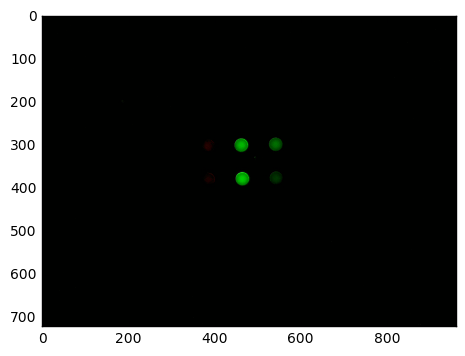

In [4]:
im = plt.imread(fname%200)
plt.imshow(im)

In [12]:
im.shape
w,h,_ = im.shape

In [9]:
nt = 239
ims = np.zeros((w,h,nt))
for i in range(0,nt):
    im = plt.imread(fname%(i*1)) #i*10 tomaria cada 10 steps
    ims[:,:,i] = im[:,:,1]

In [10]:
ims.shape

(720, 960, 239)

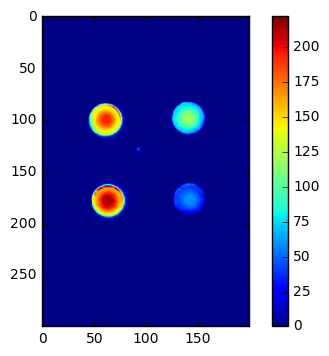

In [11]:
imssub = ims[200:500,400:600,:]
plt.imshow(imssub[:,:,-1])
plt.colorbar()

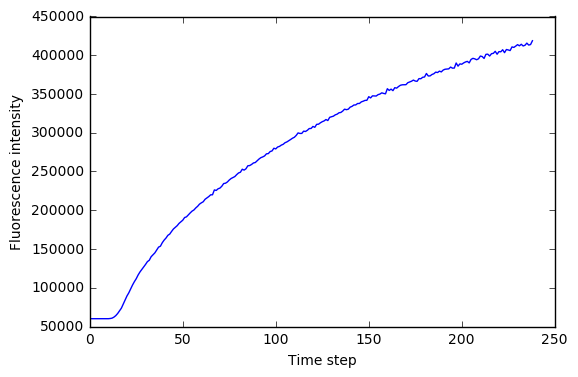

In [15]:
sumims = imssub.sum(axis=(0,1))
plt.plot(sumims)
plt.xlabel('Time step')
plt.ylabel('Fluorescence intensity')

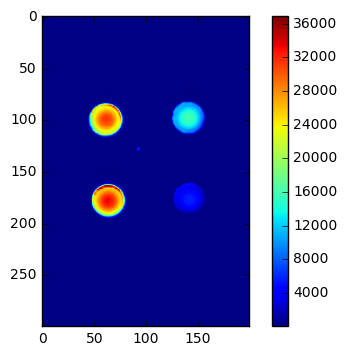

In [83]:
ims_sum = imssub.sum(axis=2)
plt.imshow(ims_sum)
plt.colorbar()

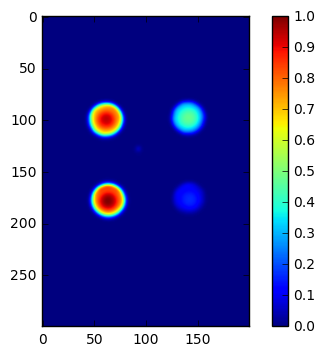

In [84]:
from skimage.filters import gaussian
simsub = gaussian(ims_sum, 2)
nsimsub = (simsub-simsub.min())/(simsub.max()-simsub.min())
plt.imshow(nsimsub)
plt.colorbar()

In [85]:
import skimage.feature as skfeat
A = skfeat.blob_log(nsimsub, min_sigma=1.0, max_sigma=10.0, num_sigma=100, threshold=0.25, overlap=0.8)
print A.shape
print A[0:4,:]

(3, 3)
[[  98.  140.   10.]
 [ 100.   61.   10.]
 [ 178.   63.   10.]]


In [86]:
rois = {}
for i in range(len(A)):
    x = A[i,0]
    y = A[i,1]
    r = 2*A[i,2]
    rois[i] = imssub[x-r:x+r,y-r:y+r,:]-bg

/Users/fernanfederici/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


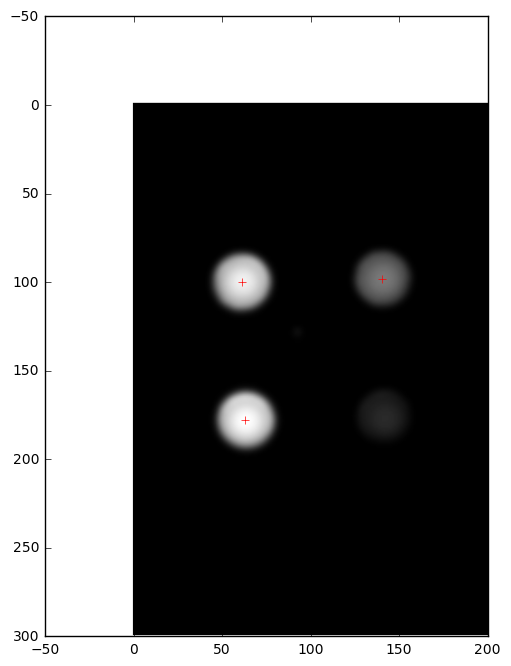

In [87]:
plt.figure(figsize=(8,8))
plt.imshow(nsimsub, cmap='gray')
plt.hold(True)
for i in range(len(A)):
    plt.plot(A[i,1],A[i,0],'r+')

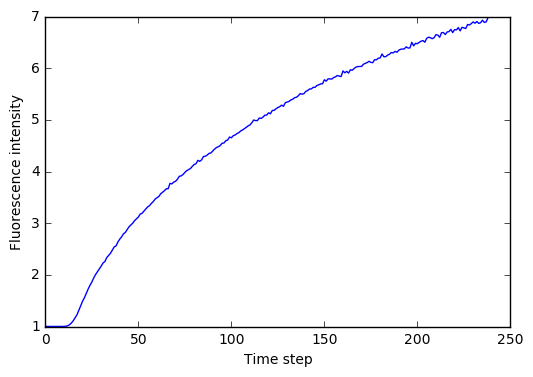

In [89]:
bg = imssub[0:500,0:500,:].mean(axis=(0,1))
plt.plot(bg)
plt.xlabel('Time step')
plt.ylabel('Fluorescence intensity')

In [90]:
rois = {}
for i in range(len(A)):
    x = A[i,0]
    y = A[i,1]
    r = 2*A[i,2]
    rois[i] = imssub[x-r:x+r,y-r:y+r,:]-bg

/Users/fernanfederici/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


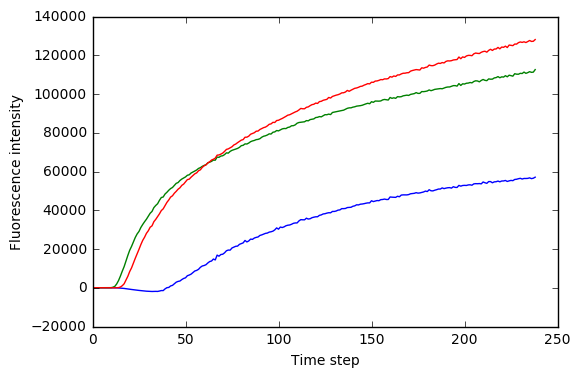

In [91]:
for i in range(len(A)):
    plt.plot(rois[i].sum(axis=(0,1)))
    plt.hold(True)
plt.xlabel('Time step')
plt.ylabel('Fluorescence intensity')
#plt.legend(['Colony %d'%i for i in range(len(A))])

In [92]:
# Get total fluorescence intensity for each colony, summing over all pixels in the region
I = {}
for idx,roi in rois.iteritems():
    I[idx] = roi.sum(axis=(0,1))

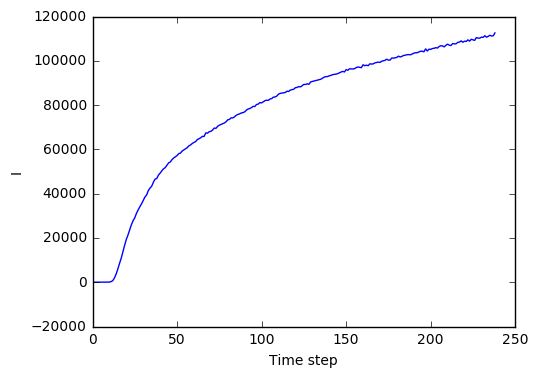

In [93]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,2)
plt.plot(I[1])
plt.xlabel('Time step')
plt.ylabel('I')

In [45]:
from scipy.interpolate import UnivariateSpline

In [47]:
x = range(len(I[1]))

In [51]:
dIdt={}
colonies = range(len(A)) #[1,2,3,4,5,6,7]
for idx in colonies:
    spl = UnivariateSpline(x,I[idx])
    spl.set_smoothing_factor(1e7)
    dIdt[idx] = spl.derivative(1)(x)